## Two way Anova 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Create a dataset

df=pd.DataFrame({"water":np.repeat(["daily","weekly"],15),
"sun":np.tile(np.repeat(["low","medium","high"],5),2,),
"height":[6,6,6,5,6,5,5,6,4,5,
6,6,7,8,7,3,4,4,4,5,
4,4,4,4,4,5,6,6,7,8]})

df.sample(10)

                         
                

,water,sun,height
6,daily,medium,5
20,weekly,medium,4
21,weekly,medium,4
12,daily,high,7
8,daily,medium,4
28,weekly,high,7
16,weekly,low,4
2,daily,low,6
22,weekly,medium,4
24,weekly,medium,4


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

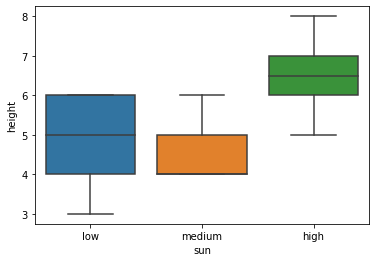

In [3]:
sns.boxplot(df["sun"],df["height"])

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

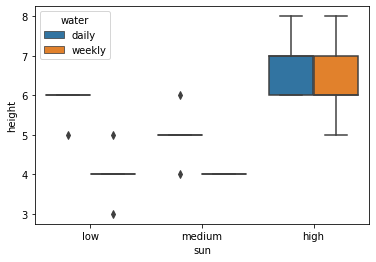

In [4]:
sns.boxplot(df["sun"],df["height"],hue=df["water"])

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# One way Anova
model=ols("height~ sun",data=df).fit()
sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,24.866667,12.433333,14.105042,0.000064
Residual,27.0,23.800000,0.881481,NaN,NaN


# Two way Anova

In [6]:
# Two way Anova
model = ols("height ~ C(sun) + C(water) + C(sun):C(water)", data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(sun),24.866667,2.0,23.3125,0.000002
C(water),8.533333,1.0,16.0000,0.000527
C(sun):C(water),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


# Another way of two way anova

In [7]:
import pingouin as pg
aov=pg.anova(data=df,dv="height",between=["sun","water"],detailed=True)
print(aov)

        Source         SS  DF         MS        F     p-unc       np2
0          sun  24.866667   2  12.433333  23.3125  0.000002  0.660177
1        water   8.533333   1   8.533333  16.0000  0.000527  0.400000
2  sun * water   2.466667   2   1.233333   2.3125  0.120667  0.161572
3     Residual  12.800000  24   0.533333      NaN       NaN       NaN


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


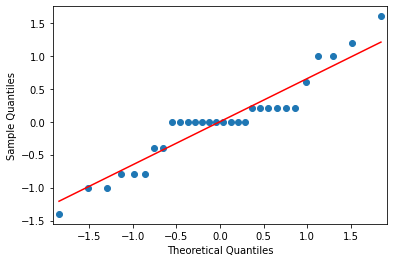

In [8]:
# Qq norm plot
res = model.resid
fig = sm.qqplot(res,line="s")
plt.show()
